In [1]:
#  pip install jupyterlab_widgets
# start this notebook with
# $> jupyter lab

# give us interactive plots in jupyter lab:
# %matplotlib widget
%load_ext autoreload
import matplotlib
import numpy
import json
import matplotlib.pyplot as plt

In [2]:
import importlib
import helper_libs as util
importlib.reload(util)
%autoreload 1
%aimport helper_libs

Module re-loaded
Module re-loaded


In [3]:
# Many open interactive plots take lots of memory.  Close them occasionally by running this block
matplotlib.pyplot.close('all')

In [4]:
print("""
Run the following:
LAST_JOB=$(sbatch --nodes 4 --exclusive --ntasks-per-node 64 ./make_data_ompi4.sbatch.sh | awk '{print $4}')
LAST_JOB=$(sbatch --dependency=afterok:$LAST_JOB --nodes 4 --exclusive --ntasks-per-node 1 ./make_data_ompi4.sbatch.sh | awk '{print $4}')
LAST_JOB=$(sbatch --dependency=afterok:$LAST_JOB --nodes 1 --exclusive --ntasks-per-node 64 ./make_data_ompi4.sbatch.sh | awk '{print $4}')
""")


Run the following:
LAST_JOB=$(sbatch --nodes 4 --exclusive --ntasks-per-node 64 ./make_data_ompi4.sbatch.sh | awk '{print $4}')
LAST_JOB=$(sbatch --dependency=afterok:$LAST_JOB --nodes 4 --exclusive --ntasks-per-node 1 ./make_data_ompi4.sbatch.sh | awk '{print $4}')
LAST_JOB=$(sbatch --dependency=afterok:$LAST_JOB --nodes 1 --exclusive --ntasks-per-node 64 ./make_data_ompi4.sbatch.sh | awk '{print $4}')



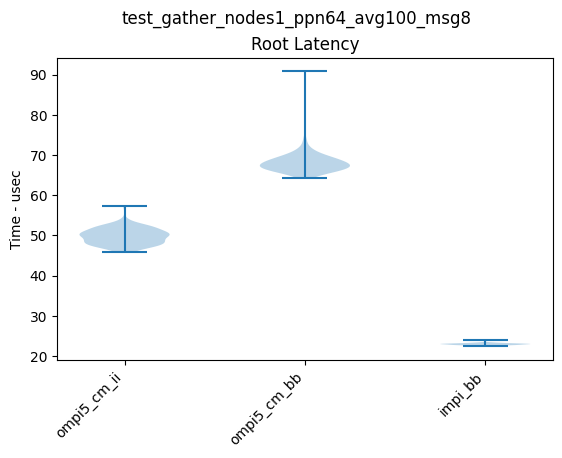

In [5]:
names = ['data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_cm_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_cm_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_impi_bb.dat',]

util.compare_roots(names)


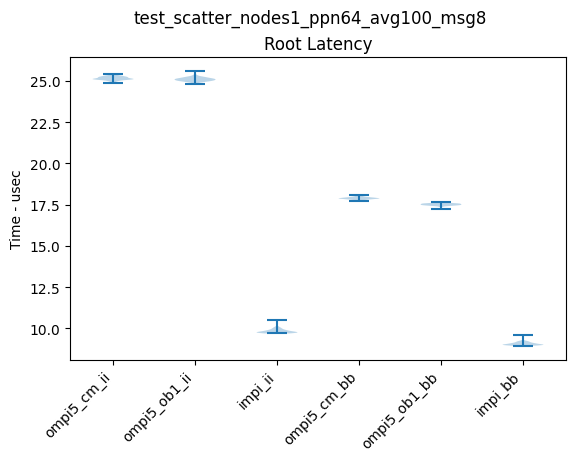

In [6]:
names = ['data/test_scatter_nodes1_ppn64_avg100_msg8_ompi5_cm_ii.dat',
         'data/test_scatter_nodes1_ppn64_avg100_msg8_ompi5_ob1_ii.dat',
         'data/test_scatter_nodes1_ppn64_avg100_msg8_impi_ii.dat',
         'data/test_scatter_nodes1_ppn64_avg100_msg8_ompi5_cm_bb.dat',
         'data/test_scatter_nodes1_ppn64_avg100_msg8_ompi5_ob1_bb.dat',
         'data/test_scatter_nodes1_ppn64_avg100_msg8_impi_bb.dat',]
util.compare_roots(names)


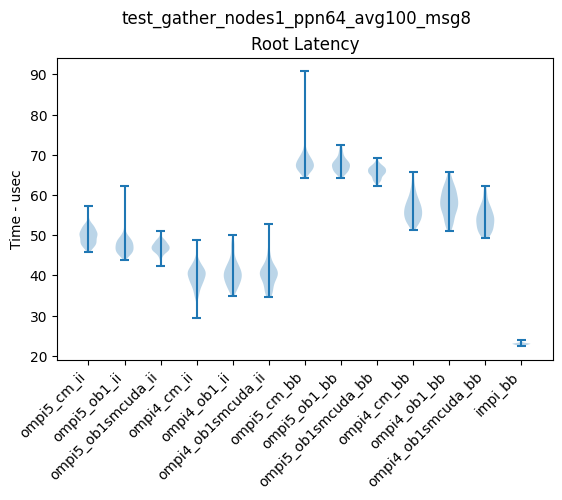

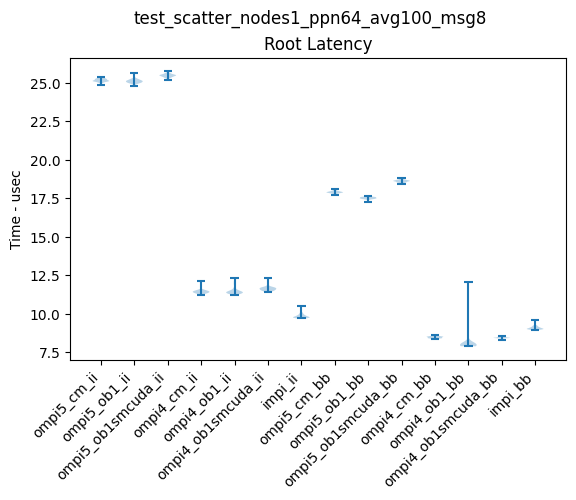

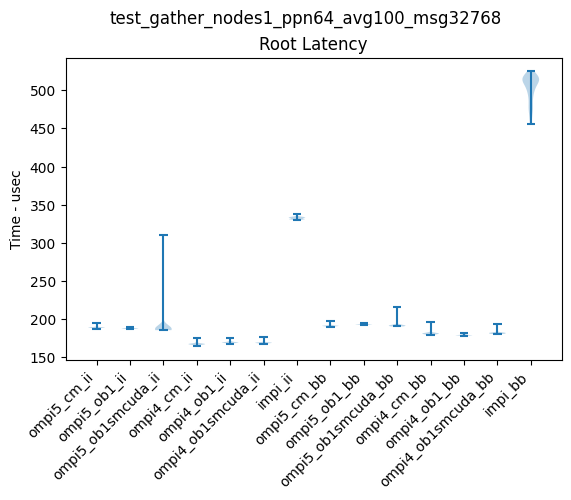

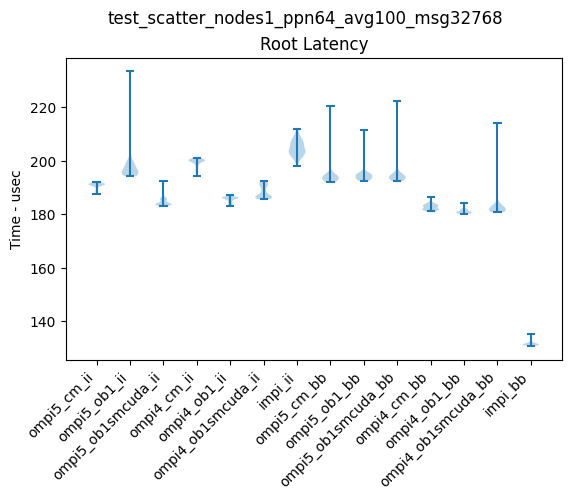

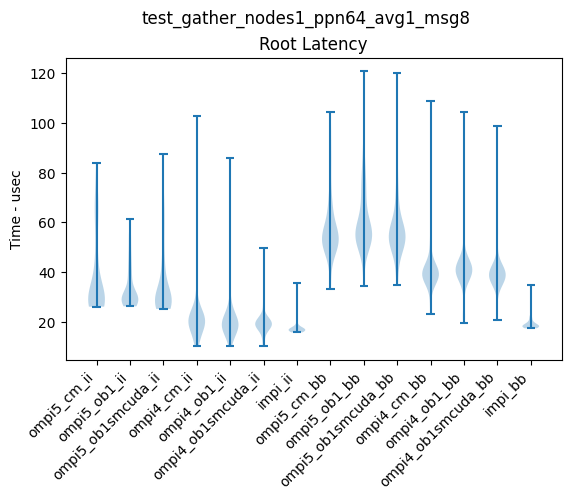

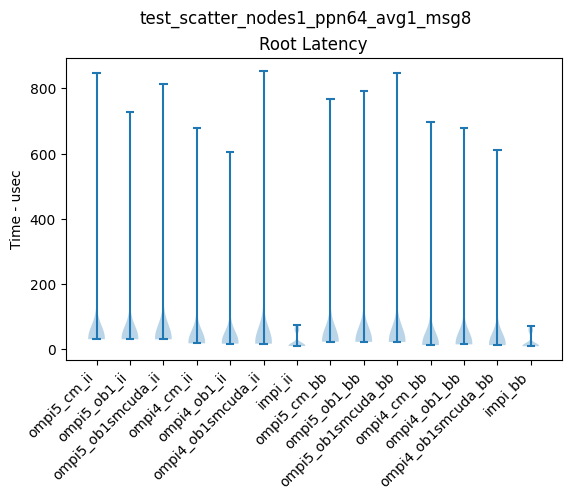

In [7]:
names = ['data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_cm_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_ob1_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_ob1smcuda_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_cm_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_ob1_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_ob1smcuda_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_impi_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_cm_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_ob1_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_ob1smcuda_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_cm_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_ob1_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_ob1smcuda_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_impi_bb.dat',
        ]
scatters = [ n.replace('gather','scatter') for n in names]
util.compare_roots([n for n in names if not 'impi_ii' in n])
util.compare_roots(scatters)
util.compare_roots([ n.replace('msg8','msg32768') for n in names])
util.compare_roots([ n.replace('msg8','msg32768') for n in scatters])

util.compare_roots([ n.replace('avg100','avg1') for n in names])
util.compare_roots([ n.replace('avg100','avg1') for n in scatters])

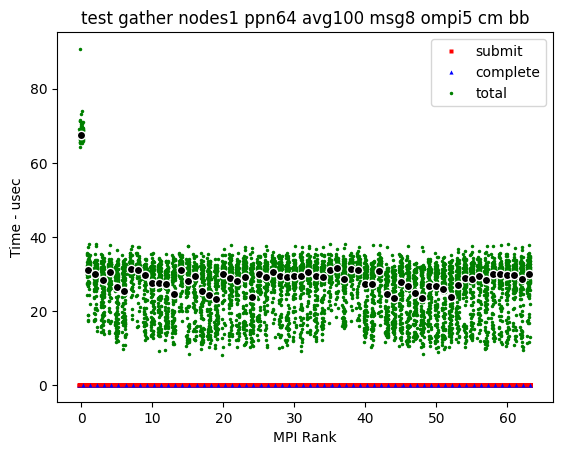

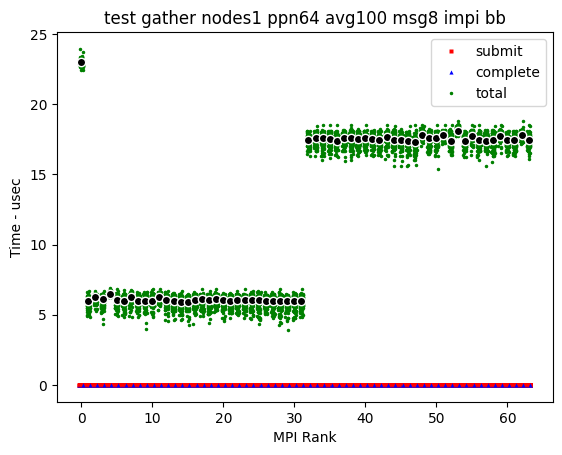

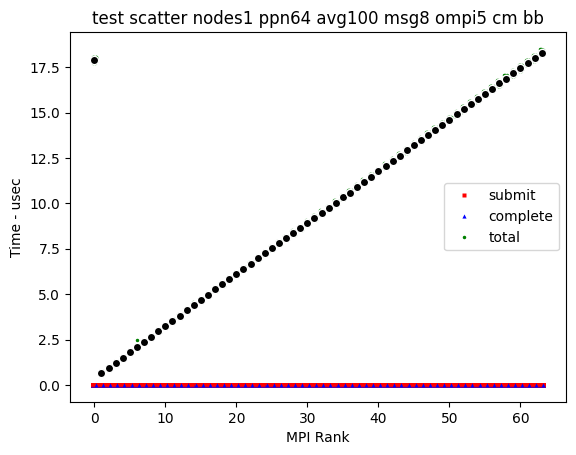

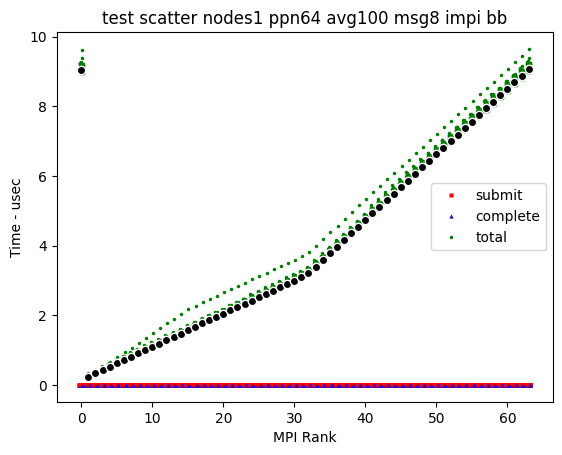

In [8]:
names = ['data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_cm_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_impi_bb.dat',
         'data/test_scatter_nodes1_ppn64_avg100_msg8_ompi5_cm_bb.dat',
         'data/test_scatter_nodes1_ppn64_avg100_msg8_impi_bb.dat',]
for n in names:
    util.scatter_time_v_rank(n)

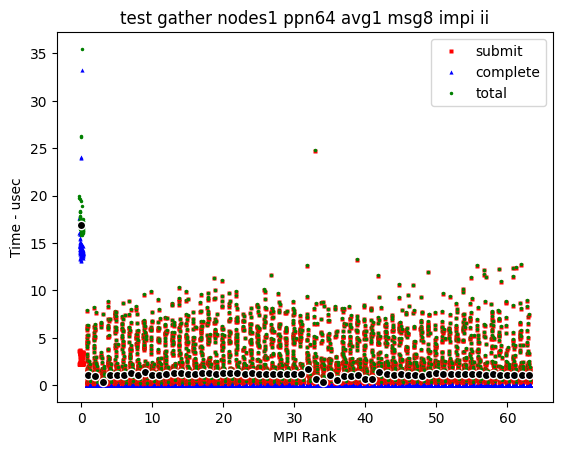

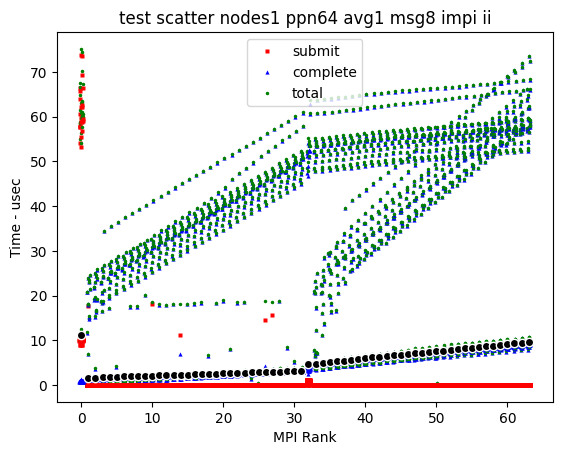

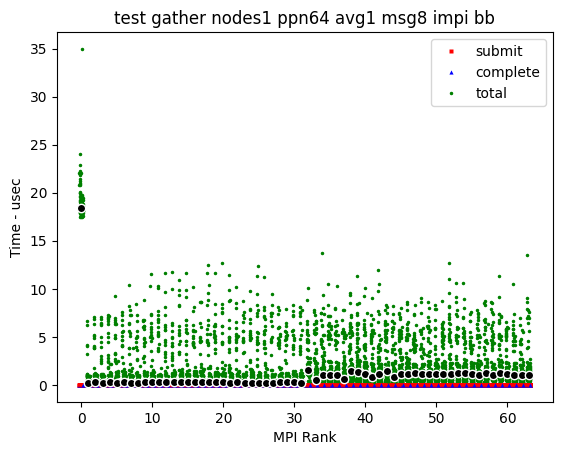

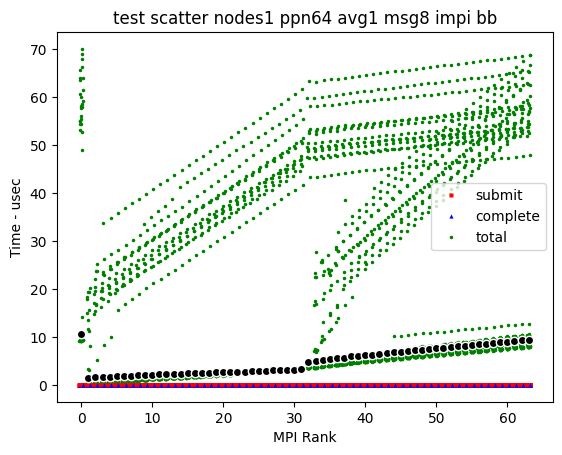

In [9]:
names = [   'data/test_gather_nodes1_ppn64_avg1_msg8_impi_ii.dat',
            'data/test_gather_nodes1_ppn64_avg1_msg8_impi_bb.dat',]
for n in names:
    util.scatter_time_v_rank(n)
    util.scatter_time_v_rank(n.replace('gather','scatter'))

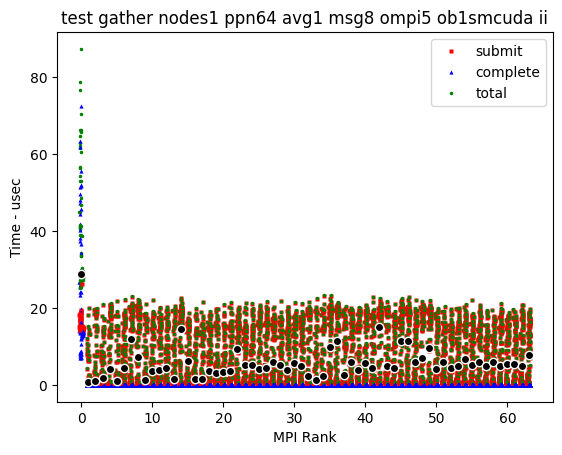

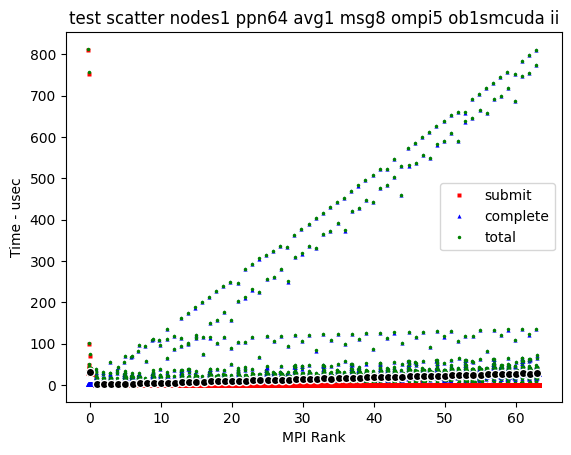

In [10]:
names = ['data/test_gather_nodes1_ppn64_avg1_msg8_ompi5_ob1smcuda_ii.dat',
         'data/test_scatter_nodes1_ppn64_avg1_msg8_ompi5_ob1smcuda_ii.dat',]
for n in names:
    util.scatter_time_v_rank(n)

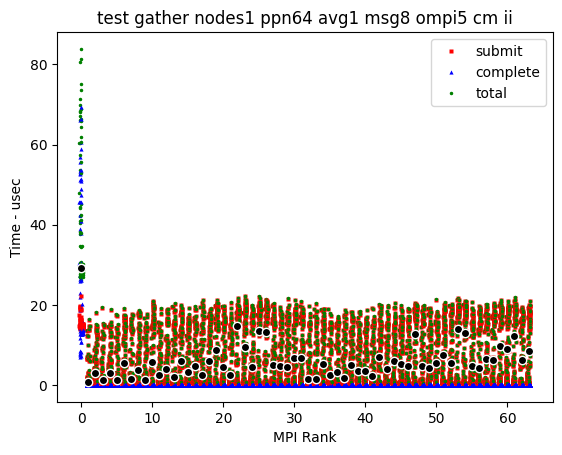

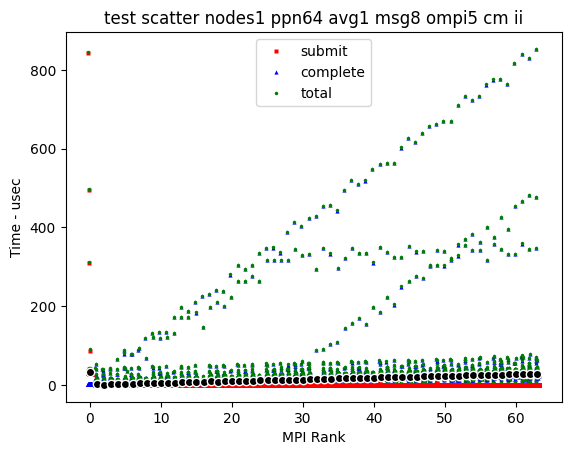

In [11]:
names = ['data/test_gather_nodes1_ppn64_avg1_msg8_ompi5_cm_ii.dat',
         'data/test_scatter_nodes1_ppn64_avg1_msg8_ompi5_cm_ii.dat',]
for n in names:
    util.scatter_time_v_rank(n)

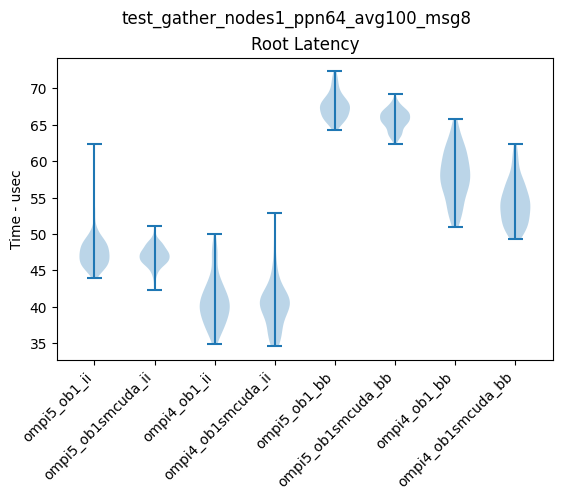

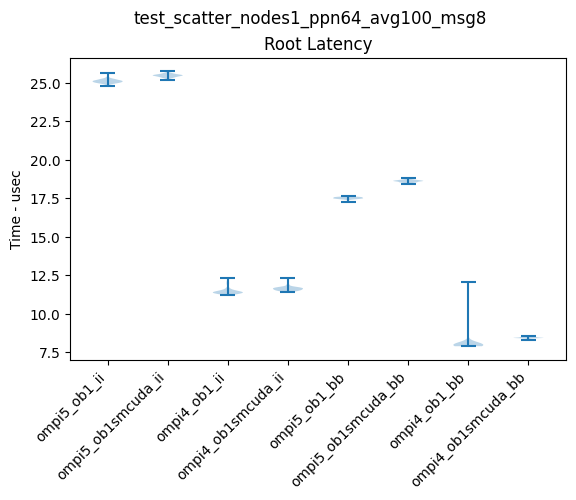

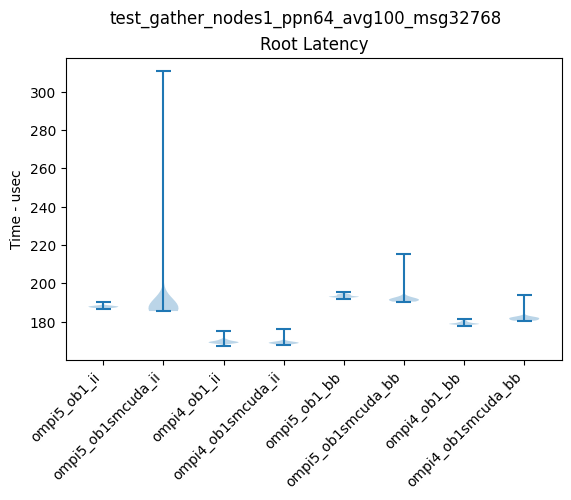

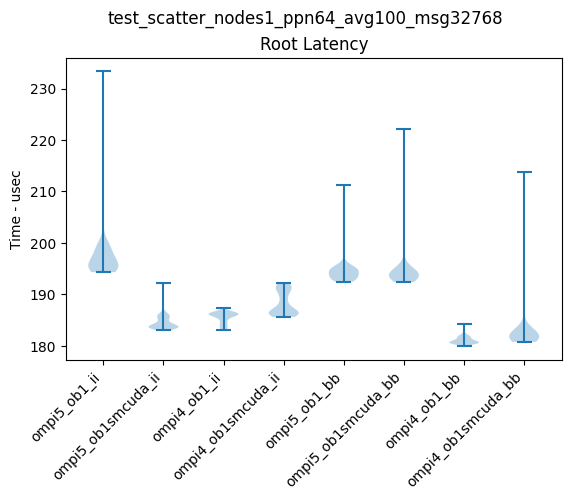

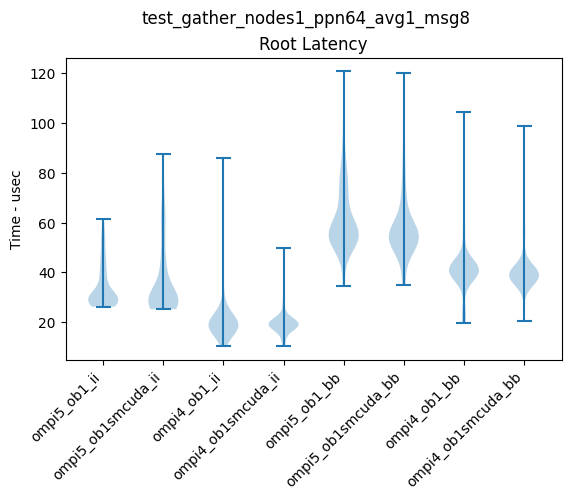

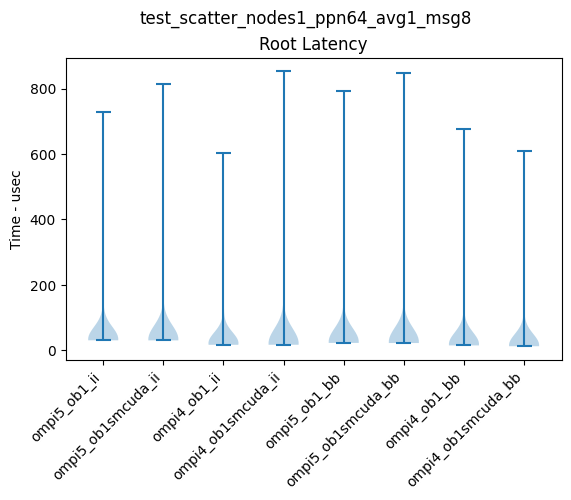

In [12]:
names = ['data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_ob1_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_ob1smcuda_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_ob1_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_ob1smcuda_ii.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_ob1_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi5_ob1smcuda_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_ob1_bb.dat',
         'data/test_gather_nodes1_ppn64_avg100_msg8_ompi4_ob1smcuda_bb.dat',
        ]
scatters = [ n.replace('gather','scatter') for n in names]
util.compare_roots([n for n in names if not 'impi_ii' in n])
util.compare_roots(scatters)
util.compare_roots([ n.replace('msg8','msg32768') for n in names])
util.compare_roots([ n.replace('msg8','msg32768') for n in scatters])

util.compare_roots([ n.replace('avg100','avg1') for n in names])
util.compare_roots([ n.replace('avg100','avg1') for n in scatters])